# `The humble IMDB review classification problem!`
### This is a dataset that comprises of 25,000 movies reviews from IMDB, each labeled by sentiment (positive or negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data.


## `The following are the steps involved in solving simple problems using Neural networks:`
1. Download/Import DataSet 
2. Split/Load data into `TrainSet` and `TestSet`
3. Prepare the data (preprocessing) in such a way that its compatible to be fed to our Neural Network (NN)
4. Contrusct/Architect a NN
5. Compile the NN by using 3 things: `Optimizer` | `Loss` | `Metrics of evaluation`
6. Train/Fit the NN to our DataSet

In [ ]:
from keras.datasets import imdb                                     # Importing the dataset of IMDB from keras

In [ ]:
(train_reviews, train_labels), (test_reviews, test_labels) = imdb.load_data(num_words= 5000)
                                                                    # Here, we use the load_data() function to give us 4 sets of data
                                                                    # The (num_words = 5000) returns us only the top 5000 most frequent words in the data

print(f"This is what the first sample of the train_reviews look like: \n{train_reviews[0]}", end='')
print(f"\n\nThe length of this list is: {len(train_reviews[0])}")
print(f"The length of the second sample is: {len(train_reviews[1])}")
print(f"The maximum value in this sequence is: {max(train_reviews[0])}, and if you check other sequences it will be between 0 to 4999")

This is what the first sample of the train_reviews look like: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]

The length 

## Preprocessing the Data:
1. Here we will `one-hot-encode the train_reviews` so that it becomes a matrix of 1s and 0s.
2. Since we have set a cap of 5000 on our `load_data()` function, the maximum value in our list of sequences will be `5000`. 
3. To explain how our one-hot-encoded matrix will look like, consider the image below. Let us say the num_words in `load_data()` is set at **9**, that means, the values each sequence in the train_reviews can range from **(0 to 8)**.
4. Let the length of sequences (number of sequences in the train_reviews) be 11. Now we will make a matrix of size (length of sequences * num_words) and fill it with 0s.
5. Then we will consider each sequences one at a time and let the row of 0s be left as it is in the matrix, except for those indices whose numbers are present in the sequence.
6. That is, if the sequence is [3, 9], we will replace the 0s of the 3rd and 9th indices of the matrix row corresponding to that sequence with 1s.

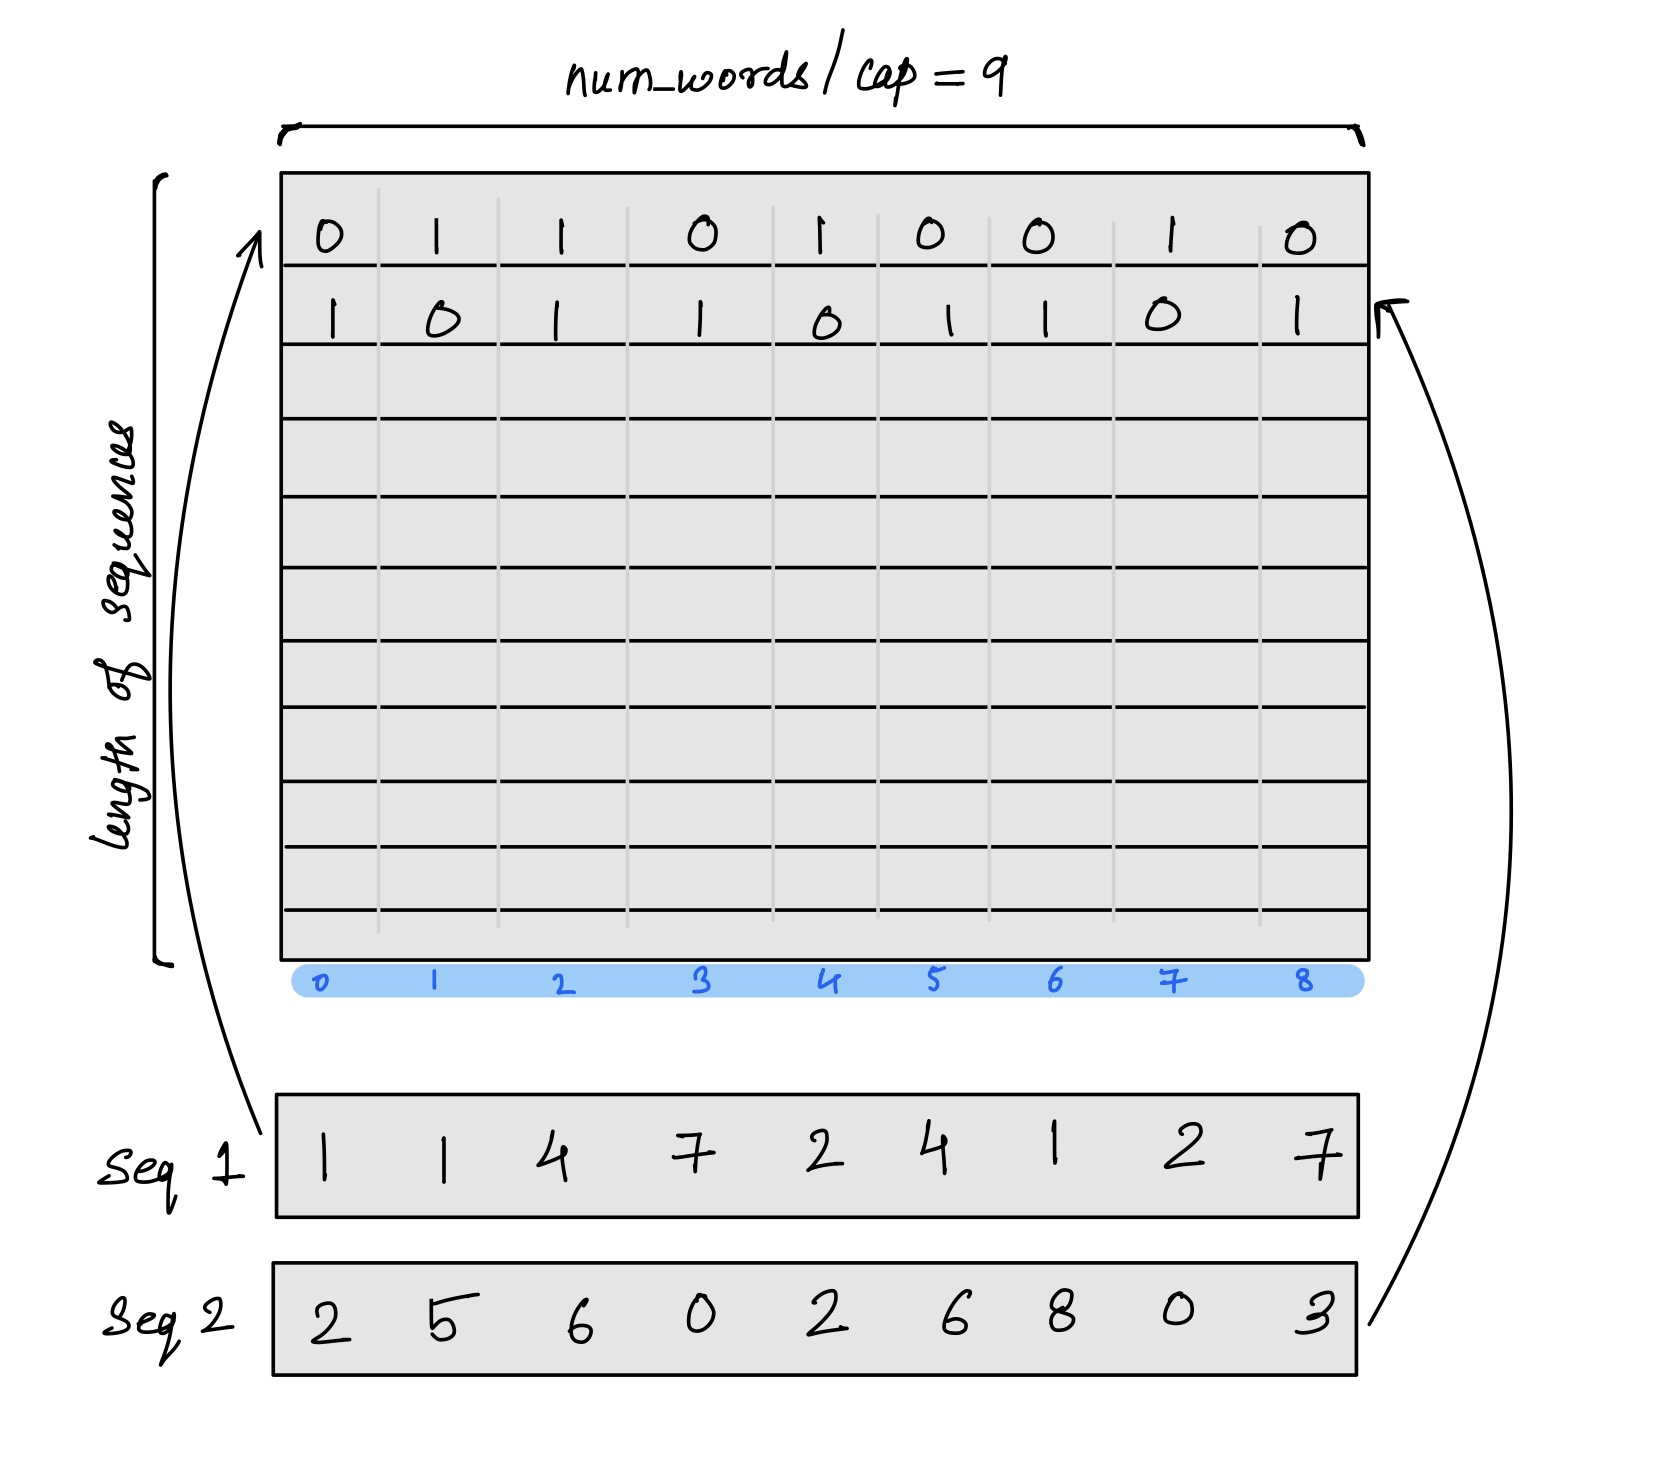

7.  Lets do the encoding then!

In [ ]:
import numpy as np                                                  # Importing numpy library

one_hot_encoded_train_matrix = np.zeros((len(train_reviews), 5000)) # Creating a matric of size(length of train reviews * num_words), that is
                                                                    # filled with 0s
# print(one_hot_encoded_train_matrix.shape)
for i, sequence in enumerate(train_reviews):                        # Traversing through each sequence in the train_reviews
  one_hot_encoded_train_matrix[i, sequence] = 1                     # replacing the 0s in the matrix with 1s whose corresponding indices are present in 
                                                                    # the sequence from train_reviews

one_hot_encoded_test_matrix = np.zeros((len(test_reviews), 5000))   # Creating a matric of size(length of test reviews * num_words), that is
                                                                    # filled with 0s
for i, sequence in enumerate(test_reviews):                         # Traversing through each sequence in the test_reviews
  one_hot_encoded_test_matrix[i, sequence] = 1                      # replacing the 0s in the matrix with 1s whose corresponding indices are present in
                                                                    # the sequence from train_reviews
vectorised_train_labels = np.array(train_labels).astype("float32")  # Vectorising the train_labels
vectorised_test_labels = np.array(test_labels).astype("float32")    # Vectorising the test_labels


# a = [3,7,1]
# b = np.zeros(10)
# b[a] = 1



In [ ]:
from keras import models                                          # Importing models from keras
from keras import layers                                          # There are two types of models that keras offers: Sequential API and Functional API
                                                                  # We will use the sequential one!

our_imdb_classifier = models.Sequential(                          # Creating our neural network with a sequential model
    [
        layers.Dense(units = 512, activation = "relu", input_shape= (5000,)),
                                                                  # Units are the number of neurons in that layer
                                                                  # activation function is used to induce non-linearity in the network, We use ReLu.
                                                                  # Input_Shape is the shape of the data we will feed the network and it has to be mentioned
        layers.Dense(units = 256, activation = "relu"),
        layers.Dense(units = 128, activation = "relu"),
        layers.Dense(units = 64, activation = "relu"),
        layers.Dense(units = 1, activation = "sigmoid")           # The last layer will have 1 neurons as we are doing binary classification
                                                                  # The activation function now will be sigmoid, as it squashes the outputs into a 
    ]                                                             # range between 0 to 1, ideal for binary classification.
)

our_imdb_classifier.compile(                                      # We use the compile method to configure our model for training
    optimizer= "adam",                                            # Optimizer is a mechanism by which the model will update itself to become better
    loss = "binary_crossentropy",                                 # loss is the loss function is the mechanism used to steer the model in the right
                                                                  # direction to better itself!
    metrics = ["accuracy"]                                        # A means to judge the performance of the model (example: accuracy)
)



In [ ]:
our_imdb_classifier.fit(one_hot_encoded_train_matrix, vectorised_train_labels, epochs = 10, batch_size= 64)
                                                                  # Now lets train our NN for 10 epochs and see what happens! 
                                                                  # The fit method needs our train images and train labels, epochs needed and batch size!

Epoch 1/10
391/391 [==============================] - 22s 52ms/step - loss: 0.3246 - accuracy: 0.8629
Epoch 2/10
391/391 [==============================] - 18s 47ms/step - loss: 0.1827 - accuracy: 0.9274
Epoch 3/10
391/391 [==============================] - 21s 53ms/step - loss: 0.0696 - accuracy: 0.9746
Epoch 4/10
391/391 [==============================] - 19s 47ms/step - loss: 0.0275 - accuracy: 0.9909
Epoch 5/10
391/391 [==============================] - 19s 50ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 6/10
391/391 [==============================] - 18s 46ms/step - loss: 0.0115 - accuracy: 0.9963
Epoch 7/10
391/391 [==============================] - 19s 49ms/step - loss: 0.0079 - accuracy: 0.9971
Epoch 8/10
391/391 [==============================] - 18s 45ms/step - loss: 0.0062 - accuracy: 0.9978
Epoch 9/10
391/391 [==============================] - 18s 47ms/step - loss: 0.0106 - accuracy: 0.9965
Epoch 10/10
391/391 [==============================] - 19s 48ms/step - loss: 0.005

My Model reached an accuracy of 99.81% during the training session. Most certainly has overfitted! If you dont know this concept, google/chatgpt or view the previous implementation on github (MNIST).
Lets now see how it performs on the test_reviews to judge its performance!


In [ ]:
test_loss, test_accuracy = our_imdb_classifier.evaluate(one_hot_encoded_test_matrix, vectorised_test_labels)
                                                                # The evaluate method to check the performance of our model on test/new data
                                                                # which returns us 2 values: loss and accuracy!

782/782 [==============================] - 6s 8ms/step - loss: 0.7699 - accuracy: 0.8672


I recieved an accuracy of 86.72% on my test data which is disastrous when compared to the accuracy we got on the train data. To improve this, try different methods to eliminate the overfitting problem! You can refer the last implementation on github.
Again, ChatGPT/Google can help!